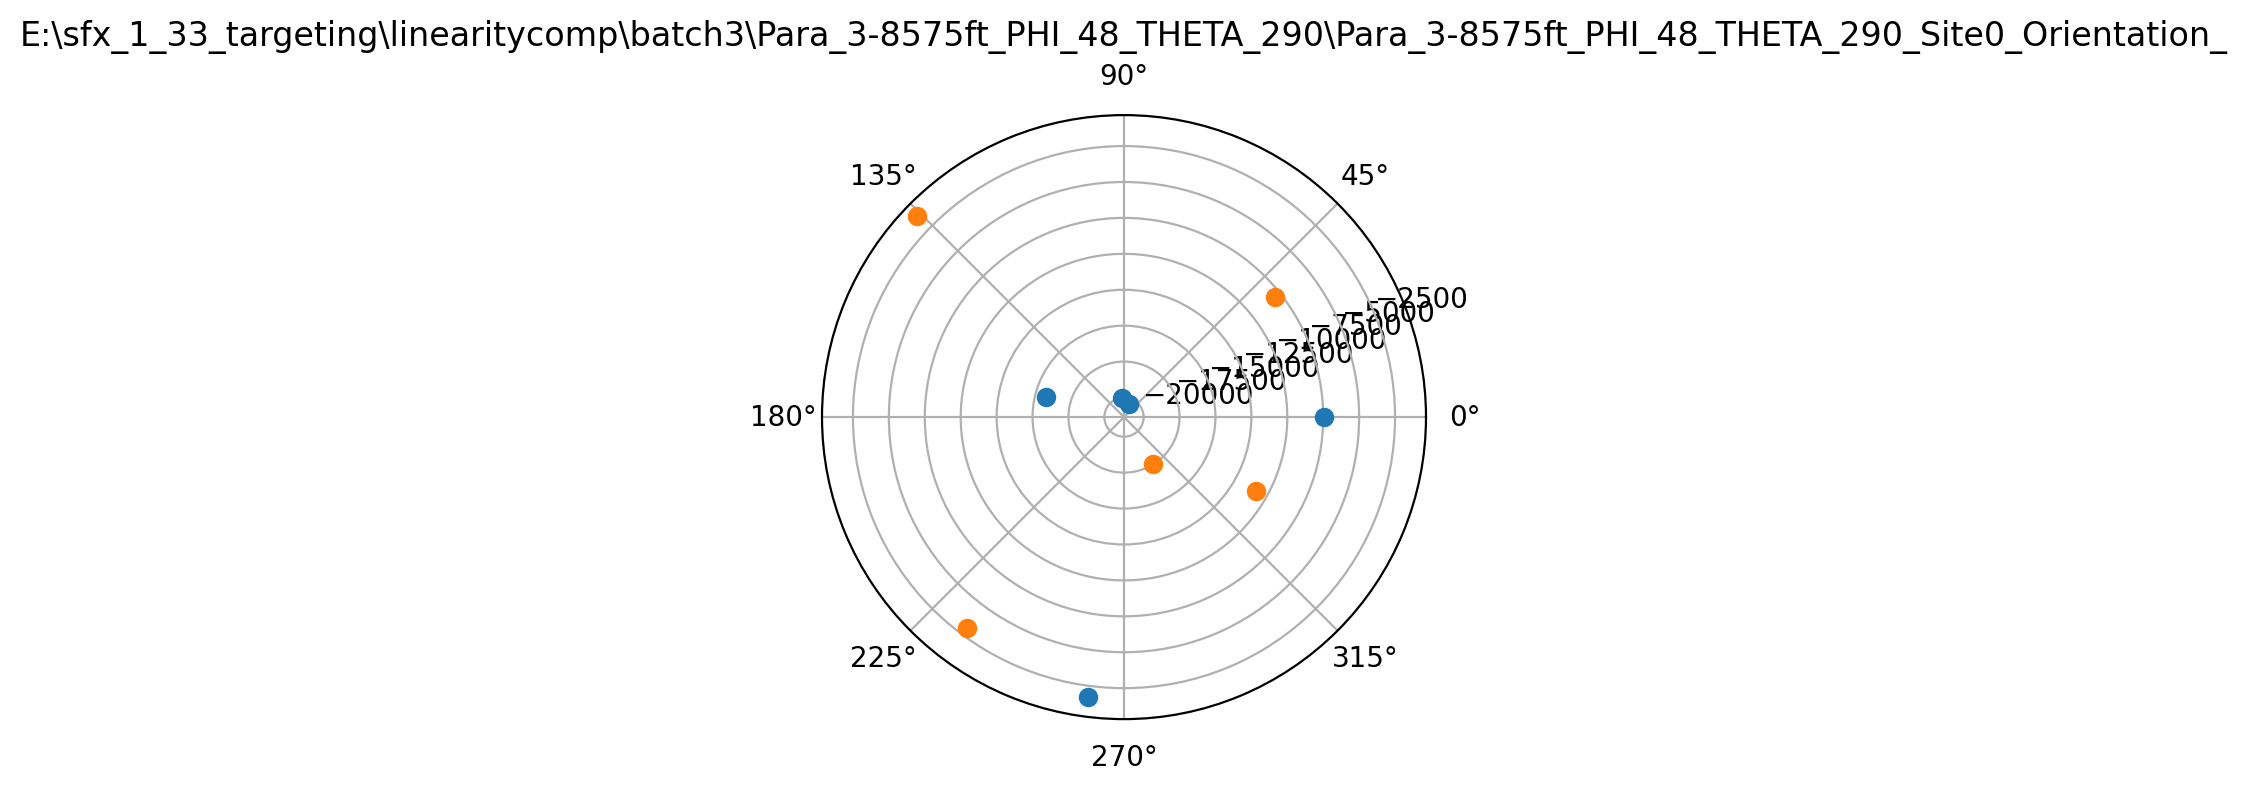

In [28]:
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filenamepart = "E:\\sfx_1_33_targeting\\linearitycomp\\batch3\\Para_3-8575ft_PHI_48_THETA_290\\Para_3-8575ft_PHI_48_THETA_290_Site0_Orientation_"
front1max,front2max= [],[]
for i in range(5):
    k_diff_array,k_diff_array2,=[],[]
    filename = filenamepart + str(i) + ".ikic"
    file = open(filename , "r")
    lines=file.readlines() # splitst the ikic file into lines
    file.close()
    front = 0 #tracking the fronts
    #print(len(l)) #tells the number of lines in the ikic file.
    front1end = len(lines) # sets the end to the end of the front
    for _ in range(len(lines)):
        if lines[_][0] == 'B':
            if front == 1:
                front1end = _ # sets the end of the first front to the where b = 
            front += 1
    for k in range(1,front1end): # for the first front
        currentline = lines[k] #sets to be split
        arr = currentline.split(',') # makes an array of the info from k_dif
        #print(arr)
        #print(arr[-1][0:-2]) #prints k diff
        k_diff_array.append(float(arr[-1][0:-2])) #makes an array of the k diffs
    front1max.append(max(k_diff_array))
    if front1end != len(lines): #for the second front
        for l in range( front1end +1, len(lines)):
            currentline = lines[l] #sets to be split
            arr = currentline.split(',') # makes an array of the info from k_dif
            k_diff_array2.append(float(arr[-1][0:-2])) #makes an array of the k diffs  
        front2max.append(max(k_diff_array2))
    #print('orentation equasl' , i)
    #print(k_diff_array) 
    #if k_diff_array2 != []:
    #    print(k_diff_array2)
#print(front1max)
#for lk in range(len(front1max)):
#    if front1max[lk] < 0:
#        front1max[lk] = -abs(front1max[lk])

if front2max != []:
    #for lk in range(len(front2max)):
    #    if front2max[lk] < 0:
    #        front2max[lk] = -abs(front2max[lk])
    theta=[ -36 , 0 , 36 , 72 , 108 ]
    theta2=[ -36 +180, 0+180 , 36+180 , 72+180 , 108+180 ]
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(projection='polar')
    plt.title(filenamepart)
    plt.polar(theta,front1max,marker='o',linestyle = 'None')
    plt.polar(theta2,front2max,marker='o',linestyle = 'None')

else:
    theta = np.deg2rad([60*(-1+2*i/float(5-1)) for i in range(5)])
    fig = plt.figure(dpi=200)
    
    ax = fig.add_subplot(projection='polar')
    plt.title(filenamepart)
    plt.polar(theta,front1max,marker='o',linestyle = 'None')
    plt.plot()
    
    # have to do some stuff with pattern or [] to get it to find the correct entry. maybe lists? idk

    #InitiationToughnessFile.write(str(keq) + ',' + str(K1c_MTS) + ',' + str(K1c_MSS)
    #                                   + ',' + str(K1c_Final) + ',' + str(K_MTS) + ',' + str(K_MSS) +',' + str(K_Dominant) + ',' + str(K_diff) + '\n')  #### see if this works-bjorn